In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

plt.style.use('seaborn-whitegrid')

__Задача 1__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

In [2]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

#### Найдем коэффициенты линейной регрессии с помощью формул для парной регрессии:

In [3]:
b1 = np.cov(salary, scoring, ddof=1)[0, 1] / np.var(salary, ddof=1)
b0 = scoring.mean() - b1 * salary.mean()
b0, b1

(444.1773573243596, 2.620538882402765)

#### Найдем коэффициенты линейной регрессии с помощью метода наименьших квадратов:

In [4]:
x2 = salary.reshape(-1, 1)

y2 = scoring.reshape(-1, 1)
y2

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [5]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))
x2

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

Посчитаем определитель:

In [6]:
XTX = x2.T.dot(x2)

np.linalg.det(XTX)

349464.00000000023

Определитель не близок к нулю, поэтому можно записать аналитическое решение:

In [7]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[[444.17735732]
 [  2.62053888]]


#### Оба метода дали почти одинаковые коэффициенты

Проверим несмещённость уравнения регрессии при найденных коэффициентах по методу наименьших квадратов:

In [8]:
x2.dot(b).mean(), y2.mean()

(709.8999999999999, 709.9)

Т.к. у нас несмещенное уравнение парной регрессии, то посчитаем __коэффициент детерминации__ по формуле:
$$R^2 = r_{xy}^2$$

In [9]:
r2 = np.corrcoef(salary, scoring) ** 2
r2 = r2[0, 1]
r2

0.7876386635293682

#### Построим графики регрессий

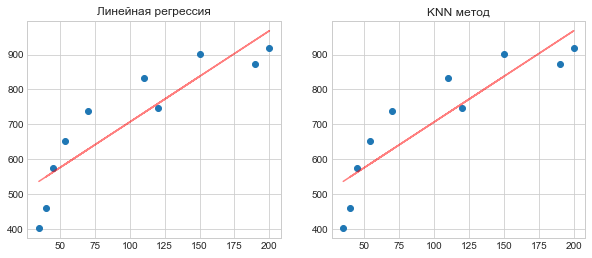

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10, 4)

ax1.scatter(salary, scoring)
ax1.plot(salary, b0 + b1 * salary, color='red', alpha=0.5)
ax1.set_title(f'Линейная регрессия')

ax2.scatter(salary, scoring)
ax2.plot(salary, b[0] + b[1] * salary, color='red', alpha=0.5)
ax2.set_title(f'KNN метод')

plt.show()

#### Посчитаем среднюю ошибку аппроксимации

In [11]:
def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """Средняя ошибка аппроксимации.
    """
    
    return np.abs((y_real - y_pred) / y_real).mean()

In [12]:
z1 = b0 + b1 * salary
z2 = x2.dot(b)

In [13]:
mean_approximation_error(scoring, z1)

0.11469251843561709

In [14]:
mean_approximation_error(y2, z2)

0.11469251843561712

#### Оценим построенное уравнение регрессии с помощью F-критерия Фишера

In [15]:
n = salary.shape[0]
k1 = 1
k2 = n - k1 - 1

f1 = (r2 / k1) / ((1 - r2) / k2)
f1

29.671640859664432

Для уровня значимости $\alpha = 0.05$ посчитаем значение $F_{crit}$:

In [16]:
alpha = 0.05

f_crit = stats.f.ppf(1 - alpha, k1, k2)
f_crit

5.317655071578714

Имеем $F > F_{crit}$, поэтому уравнение регрессии статистически значимо.

#### Построим для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента

In [17]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [18]:
s_slope = standard_error_slope(salary, scoring, z1)
s_slope

0.48108279568516005

Зададим уровень доверия $p = 0.95$, т.е. $\alpha = 0.05$

In [19]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=n-1)
t

2.2621571627409915

Доверительный интервал для параметра $b_1$:

In [20]:
(b1 - t * s_slope, b1 + t * s_slope)

(1.532253990272119, 3.7088237745334105)

Аналогично для параметра $b_0$:

In [21]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [22]:
s_intercept = standard_error_intercept(salary, scoring, z1)
s_intercept

56.46649755068153

Доверительный интервал для параметра $b_0$:

In [23]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(316.4412654351887, 571.9134492135305)

__Задача 2__

Допустим, первые 5 клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?


In [29]:
y1 = scoring[:5]
y2 = scoring[5:]

n1 = y1.shape[0]
n2 = y2.shape[0]

y1_mean = y1.mean()
y2_mean = y2.mean()

In [31]:
y1_mean = y1.mean()
y2_mean = y2.mean()
y_mean = scoring.mean()

y1_mean, y2_mean, y_mean

(645.4, 774.4, 709.9)

In [32]:
S2_b = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2

S2_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum()

S2_b, S2_w

(41602.5, 263086.39999999997)

In [33]:
k = 2

k1 = k - 1
k2 = n - k

sigma2_b = S2_b / k1
sigma2_w = S2_w / k2

sigma2_b, sigma2_w

(41602.5, 32885.799999999996)

Итак, значение статистики $F$:

In [34]:
F = sigma2_b / sigma2_w
F

1.2650596914169643

Зафиксируем уровень значимости $\alpha = 0.05$. Для него найдём критическое значение $F_{crit}$:

In [35]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

$F < F_{crit}$ - следовательно в данной выборке местопроживание людей на скоринг не влияет.

__Задача 3__

__Квартет Энскомба__ — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

```
{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
```

По каждой паре выборок посчитайте:

1. выборочное среднее и дисперсию каждой выборки,
2. коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они не практически не отличаются, постройте `scatter plot` по каждой паре выборок.

In [58]:
q = {
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

#### Найдем выборочное среднее и дисперсию каждой выборки

In [86]:
x_var = {}
x_mean = {}
y_mean = {}

for key, value in q.items():
    value = np.array(value)
    q[key] = value
    if key[:1] == 'x':
        x_var[key[1:]] = value.var(ddof=1)
        x_mean[key[1:]] = value.mean()
    else:
        y_mean[key[1:]] = value.mean()
    print(f'Выборка {key}, среднее {value.mean()}, дисперсия {value.var(ddof=1)}')

Выборка x1, среднее 9.0, дисперсия 11.0
Выборка y1, среднее 7.500909090909093, дисперсия 4.127269090909091
Выборка x2, среднее 9.0, дисперсия 11.0
Выборка y2, среднее 7.50090909090909, дисперсия 4.127629090909091
Выборка x3, среднее 9.0, дисперсия 11.0
Выборка y3, среднее 7.5, дисперсия 4.12262
Выборка x4, среднее 9.0, дисперсия 11.0
Выборка y4, среднее 7.500909090909091, дисперсия 4.123249090909091


Они почти не отличаются

In [97]:
cor = {}
for i in range(1, 5):
    x = f'x{i}'
    y = f'y{i}'
    cor[str(i)] =np.cov(q.get(x), q.get(y), ddof=1)[0, 1]
    print(f'Коэффициент корреляции Пирсона {i} группы:', np.corrcoef(q.get(x), q.get(y))[0, 1])

Коэффициент корреляции Пирсона 1 группы: 0.81642051634484
Коэффициент корреляции Пирсона 2 группы: 0.8162365060002428
Коэффициент корреляции Пирсона 3 группы: 0.8162867394895984
Коэффициент корреляции Пирсона 4 группы: 0.8165214368885028


#### Найдем коэффициенты линейной регрессии и построим уравнения:

In [105]:
b0 = {}
b1 = {}
for i in range(1, 5):
    i = str(i)
    b1[i] = cor[i] / x_var[i]
    b0[i] = y_mean[i] - b1[i] * x_mean[i]
    print(f'Уравнение {i} группы: y = {b0[i]} + {b1[i]} * x')

Уравнение 1 группы: y = 3.0000909090909094 + 0.5000909090909093 * x
Уравнение 2 группы: y = 3.000909090909089 + 0.5000000000000001 * x
Уравнение 3 группы: y = 3.002454545454544 + 0.49972727272727285 * x
Уравнение 4 группы: y = 3.0017272727272735 + 0.49990909090909086 * x


#### Построим графики:

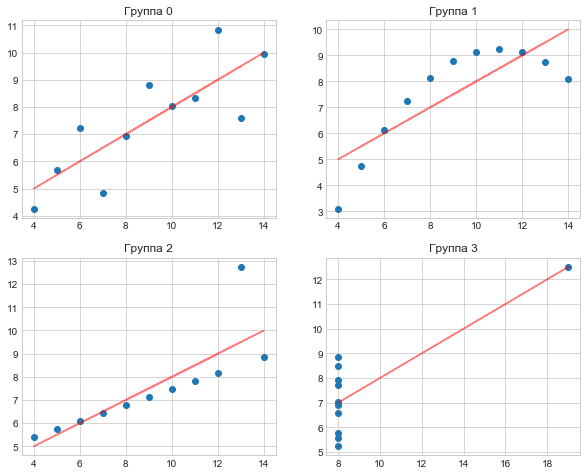

In [115]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 8)
axf = ax.flatten()

for i in range(4):
    k = str(i+1)
    x = f'x{k}'
    y = f'y{k}'
    axf[i].scatter(q[x], q[y])
    axf[i].plot(q[x], b0[k] + b1[k] * q[x], color='red', alpha=0.5)
    axf[i].set_title(f'Группа {i}')

plt.show()